In [158]:
'''
Test script for generating astigmatic beam images emulating ideal frames captured from camera.
'''
import numpy as np
from PIL import Image

(600, 600)


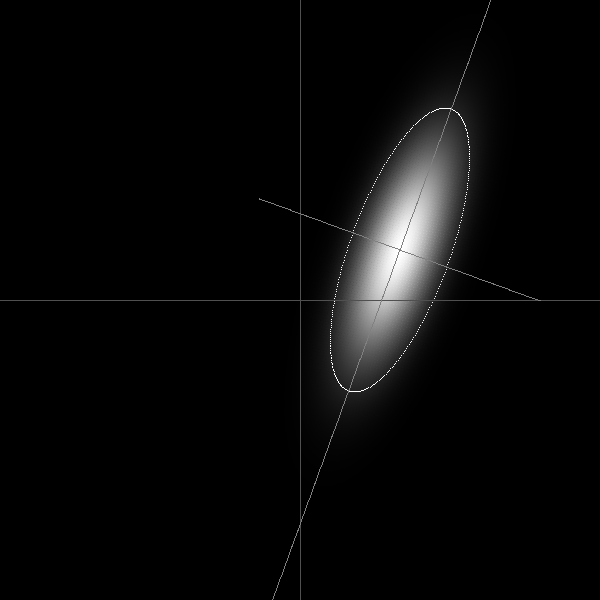

In [163]:
w, h = 600, 600
dx, dy = 100.0, 300.0
el = dx / dy
xc = int(w/2) + 100
yc = int(h/2) - 50
r2 = (dx/2)**2
p0 = 255.0
phi = 20 * np.pi / 180.0
cos_phi, sin_phi = np.cos(phi), np.sin(phi)

# ISO 11146-1 says the integration area should be 3 times larger that the beam width
x_min, x_max = -int(1.5*dx), int(1.5*dx)
y_min, y_max = -int(1.5*dy), int(1.5*dy)

draw_shape = True
draw_axes = True

image = np.zeros((h, w)).astype(np.uint8)

def set_pixel(x, y, p):
    x1 = xc + int(np.floor(x*cos_phi - y*sin_phi))
    y1 = yc + int(np.floor(x*sin_phi + y*cos_phi))
    if y1 >= 0 and y1 < h and x1 >= 0 and x1 < w: image[y1, x1] = p

def set_pixel_smooth(x, y, p):
    xr = xc + x*cos_phi - y*sin_phi
    yr = yc + x*sin_phi + y*cos_phi
    x1, y1 = int(np.floor(xr)), int(np.floor(yr))
    if y1 >= 0 and y1 < h and x1 >= 0 and x1 < w: image[y1, x1] = p
    x1, y1 = int(np.ceil(xr)), int(np.ceil(yr))
    if y1 >= 0 and y1 < h and x1 >= 0 and x1 < w: image[y1, x1] = p

for y in range(y_min, y_max):
    for x in range(x_min, x_max):
        x2 = float(x)**2
        y2 = float(y*el)**2
        p = p0 * np.exp(-2*(x2 + y2)/r2)
        set_pixel_smooth(x, y, p)

if draw_shape:
    for a in range(360):
        x = dx/2 * np.cos(a*np.pi/180.0)
        y = dy/2 * np.sin(a*np.pi/180.0)
        set_pixel(x, y, 255)

if draw_axes:
    for x in range(w): image[int(h/2), x] = 80
    for y in range(h): image[y, int(w/2)] = 80
    for x in range(x_min, x_max): set_pixel(x, 0, 128)
    for y in range(y_min, y_max): set_pixel(0, y, 128)

print(image.shape)
Image.fromarray(image)